In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/Housing.csv'
df = pd.DataFrame(pd.read_csv(url))

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

outputs = df.pop('price')
inputs = df[features].values
                
t_un = torch.tensor(StandardScaler().fit_transform(inputs), dtype=torch.float32)
t_u = torch.tensor(inputs, dtype=torch.float32)
t_c = torch.tensor(outputs, dtype=torch.float32)
                
sample_size = t_u.shape[0]
value_size = int(0.2 * sample_size)

shuffled_indices = torch.randperm(sample_size)

train_indices = shuffled_indices[:-value_size]
val_indices = shuffled_indices[-value_size:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = t_un[train_indices]
val_t_un = t_un[val_indices]

In [2]:
def linear_model(t_u, w5, w4, w3, w2, w1, b):
    return torch.matmul(t_u, parameters[:-1]) + parameters[-1]

In [3]:
def loss_fn(t_p, t_c):
    square_error = (t_p - t_c)**2
    return square_error.mean()

In [4]:
def linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c):
    training_loss = []
    validation_loss = []
    
    for epoch in range(1, epochs+1):
        train_t_p = linear_model(train_t_u, *parameters)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = linear_model(val_t_u, *parameters)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        training_loss.append(train_loss)
        validation_loss.append(val_loss)
        
        if epoch % 500 == 0:
            print(f'Epochs: {epoch}, \tTraining loss {train_loss:}, \tValidation loss: {val_loss:}')
    print('')     
    return parameters, training_loss, validation_loss

In [5]:
#SGD Optimizer with LR: 0.1
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.1
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss1 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss1 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 1000, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 1500, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 2000, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 2500, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 3000, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 3500, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 4000, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 4500, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0
Epochs: 5000, 	Training loss 1626608631808.0, 	Validation loss: 1159480344576.0



In [6]:
#SGD Optimizer with LR: 0.01
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.01
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss2 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss2 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 1626609287168.0, 	Validation loss: 1159450591232.0
Epochs: 1000, 	Training loss 1626608762880.0, 	Validation loss: 1159481917440.0
Epochs: 1500, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0
Epochs: 2000, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0
Epochs: 2500, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0
Epochs: 3000, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0
Epochs: 3500, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0
Epochs: 4000, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0
Epochs: 4500, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0
Epochs: 5000, 	Training loss 1626608631808.0, 	Validation loss: 1159481917440.0



In [7]:
#SGD Optimizer with LR: 0.001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.001
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss3 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss3 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 4713393684480.0, 	Validation loss: 4457964240896.0
Epochs: 1000, 	Training loss 2045599809536.0, 	Validation loss: 1669929631744.0
Epochs: 1500, 	Training loss 1685026111488.0, 	Validation loss: 1248111624192.0
Epochs: 2000, 	Training loss 1635004317696.0, 	Validation loss: 1177955860480.0
Epochs: 2500, 	Training loss 1627881734144.0, 	Validation loss: 1164086476800.0
Epochs: 3000, 	Training loss 1626819657728.0, 	Validation loss: 1160730116096.0
Epochs: 3500, 	Training loss 1626648215552.0, 	Validation loss: 1159795834880.0
Epochs: 4000, 	Training loss 1626617151488.0, 	Validation loss: 1159527923712.0
Epochs: 4500, 	Training loss 1626610597888.0, 	Validation loss: 1159460552704.0
Epochs: 5000, 	Training loss 1626609287168.0, 	Validation loss: 1159453736960.0



In [8]:
#SGD Optimizer with LR: 0.0001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.0001
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss4 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss4 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 21770371334144.0, 	Validation loss: 19848664973312.0
Epochs: 1000, 	Training loss 17820196798464.0, 	Validation loss: 16504568414208.0
Epochs: 1500, 	Training loss 14690307538944.0, 	Validation loss: 13779087654912.0
Epochs: 2000, 	Training loss 12196194025472.0, 	Validation loss: 11550835343360.0
Epochs: 2500, 	Training loss 10199036329984.0, 	Validation loss: 9724690956288.0
Epochs: 3000, 	Training loss 8593211392000.0, 	Validation loss: 8225281277952.0
Epochs: 3500, 	Training loss 7297595080704.0, 	Validation loss: 6992396550144.0
Epochs: 4000, 	Training loss 6249250291712.0, 	Validation loss: 5977551667200.0
Epochs: 4500, 	Training loss 5398965780480.0, 	Validation loss: 5141492662272.0
Epochs: 5000, 	Training loss 4707958915072.0, 	Validation loss: 4452268900352.0



In [9]:
# Adam Optimizer with LR: 0.1
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.1
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss1 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss1 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 24123929526272.0, 	Validation loss: 21519203827712.0
Epochs: 1000, 	Training loss 21735199997952.0, 	Validation loss: 19324418916352.0
Epochs: 1500, 	Training loss 19543313350656.0, 	Validation loss: 17311993954304.0
Epochs: 2000, 	Training loss 17532470689792.0, 	Validation loss: 15467319132160.0
Epochs: 2500, 	Training loss 15689840590848.0, 	Validation loss: 13778525618176.0
Epochs: 3000, 	Training loss 14005102968832.0, 	Validation loss: 12236066127872.0
Epochs: 3500, 	Training loss 12469933178880.0, 	Validation loss: 10832230481920.0
Epochs: 4000, 	Training loss 11077570002944.0, 	Validation loss: 9560747147264.0
Epochs: 4500, 	Training loss 9822362664960.0, 	Validation loss: 8416365379584.0
Epochs: 5000, 	Training loss 8699388100608.0, 	Validation loss: 7394490318848.0



In [10]:
# Adam Optimizer with LR: 0.01
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.01
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss2 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss2 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 26453185921024.0, 	Validation loss: 23660723175424.0
Epochs: 1000, 	Training loss 26184890974208.0, 	Validation loss: 23413991145472.0
Epochs: 1500, 	Training loss 25918709956608.0, 	Validation loss: 23169215758336.0
Epochs: 2000, 	Training loss 25654521233408.0, 	Validation loss: 22926292156416.0
Epochs: 2500, 	Training loss 25392230432768.0, 	Validation loss: 22685128065024.0
Epochs: 3000, 	Training loss 25131751571456.0, 	Validation loss: 22445643792384.0
Epochs: 3500, 	Training loss 24873019637760.0, 	Validation loss: 22207780618240.0
Epochs: 4000, 	Training loss 24615980105728.0, 	Validation loss: 21971488210944.0
Epochs: 4500, 	Training loss 24360601518080.0, 	Validation loss: 21736745598976.0
Epochs: 5000, 	Training loss 24106871291904.0, 	Validation loss: 21503525519360.0



In [11]:
# Adam Optimizer with LR: 0.001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.001
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss3 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss3 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 26696078065664.0, 	Validation loss: 23884103417856.0
Epochs: 1000, 	Training loss 26668945113088.0, 	Validation loss: 23859151503360.0
Epochs: 1500, 	Training loss 26641828937728.0, 	Validation loss: 23834214268928.0
Epochs: 2000, 	Training loss 26614740025344.0, 	Validation loss: 23809298006016.0
Epochs: 2500, 	Training loss 26587667890176.0, 	Validation loss: 23784398520320.0
Epochs: 3000, 	Training loss 26560614629376.0, 	Validation loss: 23759520006144.0
Epochs: 3500, 	Training loss 26533578145792.0, 	Validation loss: 23734656172032.0
Epochs: 4000, 	Training loss 26506558439424.0, 	Validation loss: 23709802823680.0
Epochs: 4500, 	Training loss 26479551315968.0, 	Validation loss: 23684970446848.0
Epochs: 5000, 	Training loss 26452565164032.0, 	Validation loss: 23660146458624.0



In [12]:
# Adam Optimizer with LR: 0.0001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.0001
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss4 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss4 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 26720465846272.0, 	Validation loss: 23906536652800.0
Epochs: 1000, 	Training loss 26717750034432.0, 	Validation loss: 23904036847616.0
Epochs: 1500, 	Training loss 26715034222592.0, 	Validation loss: 23901537042432.0
Epochs: 2000, 	Training loss 26712318410752.0, 	Validation loss: 23899039334400.0
Epochs: 2500, 	Training loss 26709600501760.0, 	Validation loss: 23896543723520.0
Epochs: 3000, 	Training loss 26706884689920.0, 	Validation loss: 23894046015488.0
Epochs: 3500, 	Training loss 26704170975232.0, 	Validation loss: 23891546210304.0
Epochs: 4000, 	Training loss 26701453066240.0, 	Validation loss: 23889050599424.0
Epochs: 4500, 	Training loss 26698735157248.0, 	Validation loss: 23886550794240.0
Epochs: 5000, 	Training loss 26696019345408.0, 	Validation loss: 23884053086208.0



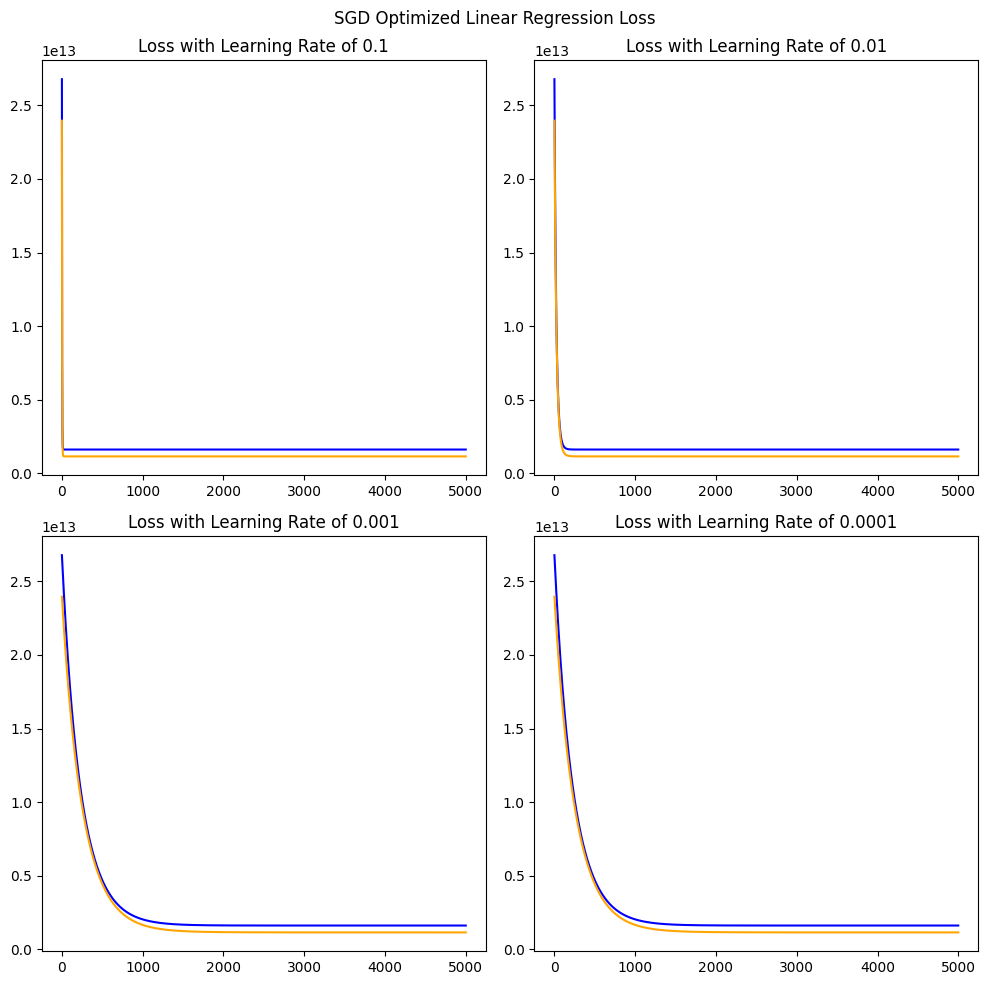

In [13]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimized Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(SGD_training_loss1, color='blue')
plt.plot(SGD_validation_loss1, color='orange')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(SGD_training_loss2, color='blue')
plt.plot(SGD_validation_loss2, color='orange')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(SGD_training_loss3, color='blue')
plt.plot(SGD_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(SGD_training_loss3, color='blue')
plt.plot(SGD_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()

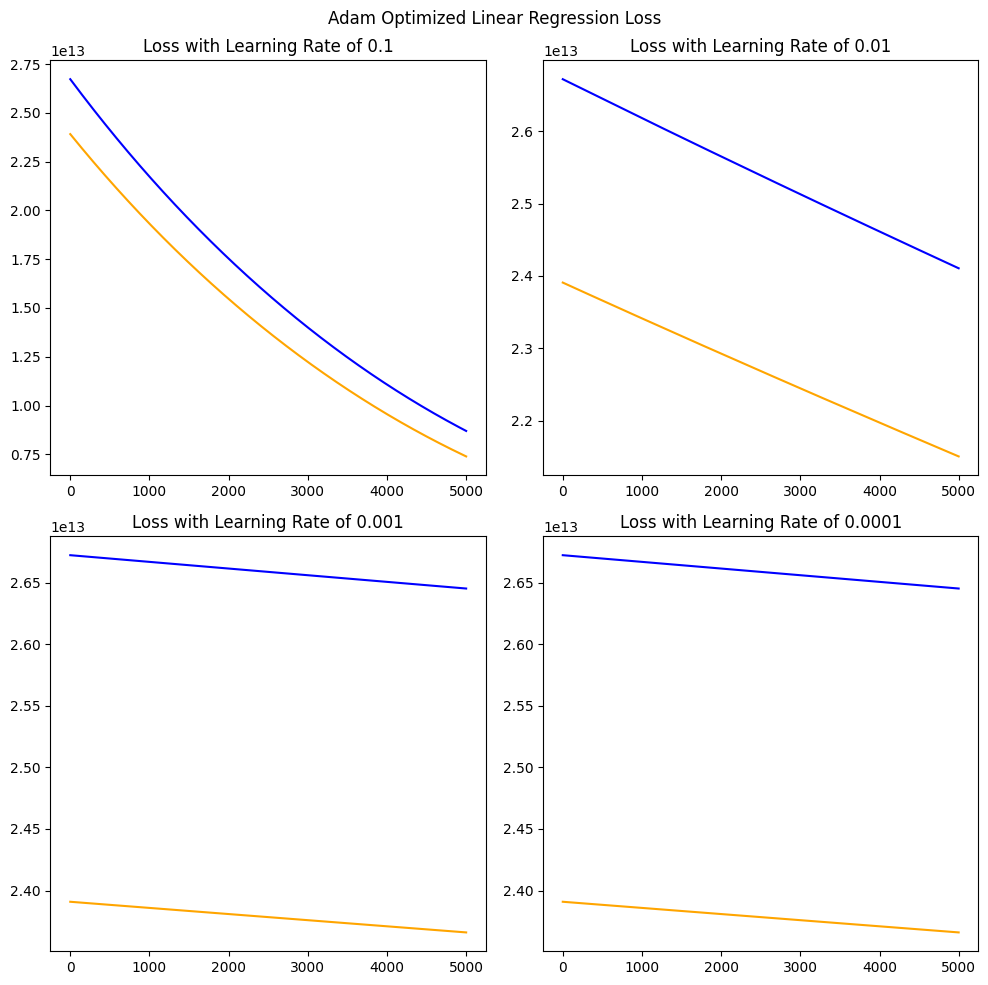

In [14]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimized Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(Adam_training_loss1, color='blue')
plt.plot(Adam_validation_loss1, color='orange')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(Adam_training_loss2, color='blue')
plt.plot(Adam_validation_loss2, color='orange')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(Adam_training_loss3, color='blue')
plt.plot(Adam_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(Adam_training_loss3, color='blue')
plt.plot(Adam_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()